In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
!pip install pyfiglet

     |████████████████████████████████| 865 kB 20.7 MB/s eta 0:00:01


ibmqfactory.load_account:WARNING:2022-10-24 03:34:25,563: Credentials are already in use. The existing account in the session will be replaced.


__        __   _                            _          _   _          
\ \      / /__| | ___ ___  _ __ ___   ___  | |_ ___   | |_| |__   ___ 
 \ \ /\ / / _ \ |/ __/ _ \| '_ ` _ \ / _ \ | __/ _ \  | __| '_ \ / _ \
  \ V  V /  __/ | (_| (_) | | | | | |  __/ | || (_) | | |_| | | |  __/
   \_/\_/ \___|_|\___\___/|_| |_| |_|\___|  \__\___/   \__|_| |_|\___|
                                                                      
 _____ _ _ _                    __     __    _     _                       
| ____| (_) |_ _____   _ _ __   \ \   / /_ _(_) __| |_ __ ___   __ _ _ __  
|  _| | | | __|_  / | | | '__|___\ \ / / _` | |/ _` | '_ ` _ \ / _` | '_ \ 
| |___| | | |_ / /| |_| | | |_____\ V / (_| | | (_| | | | | | | (_| | | | |
|_____|_|_|\__/___|\__,_|_|        \_/ \__,_|_|\__,_|_| |_| |_|\__,_|_| |_|
                                                                           
 ____                  _     
| __ )  ___  _ __ ___ | |__  
|  _ \ / _ \| '_ ` _ \| '_ \ 
| |_) | (_) | | | | | | |_) 


Press Enter to continue... 


                                                                                 _    
                                                                                / \   
                                                                               / _ \  
                                                                              / ___ \ 
                                                                             /_/   \_\
                                                                                      
                                                   __                              __  ____  
                                                  / /                             / / | __ ) 
                                                 / /____ _____ _____ _____ _____ / /  |  _ \ 
                                                / /_____|_____|_____|_____|_____/ /   | |_) |
                                               /_/                             /_/    |____/ 
        


Press Enter to continue... 



This is the minefield. Each tile is represented by a 0 and bombs are represented by a X.
The number list from 1-8 represents the rows and columns.

  1 2 3 4 5 6 7 8 
1 0 0 0 X 0 0 0 0 
2 0 X 0 0 0 0 0 0 
3 0 0 0 0 0 0 0 0 
4 0 0 0 0 0 0 0 0 
5 X 0 X 0 0 0 0 0 
6 0 0 0 0 0 0 0 X 
7 0 0 0 0 0 0 0 0 
8 0 0 0 X 0 0 X X 

Would you like to disarm a bomb or measure a bomb? 0 to disarm, 1 to measure.


Please enter a number:  1



You have chosen to measure a bomb. Please enter the coordinates of the bomb you would like to measure. If you would like to quit, enter q.
Please enter the coordinates of the tile you want to measure.
The coordinates are in the form of row, column.


Enter the row:  1
Enter the column:  4



              A
        /-----/ B
        |     |
        |     |
--------/--X--/

Trial amounts left: 100
How many times would you like to measure the bomb?


Please enter a number:  20


Measuring...

              A
        /-----/ B
        |     |
        |     |
--------/--X--/



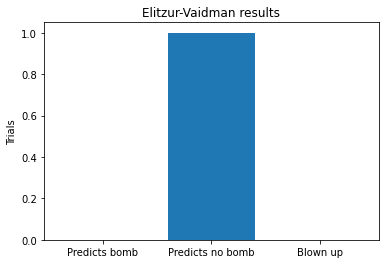

Bomb coordinates: Row: 1 Col: 4
Predicted bomb: 0
Predicted no bomb: 1
Blown up: 0


In [ ]:
import numpy as np
import pyfiglet
import matplotlib.pyplot as plt
import qiskit_ibm_runtime
from qiskit import (
    QuantumCircuit,
    QuantumRegister,
    execute,
    Aer, IBMQ)

from qiskit.quantum_info.operators import Operator
from qiskit_ibm_runtime import QiskitRuntimeService

#QiskitRuntimeService.save_account(channel="ibm_quantum", token="")

IBMQ.load_account()
IBMQ.providers()

# setup game parameters
bomb_count = 8  # total amount of bombs in game (duds and armed)
width = 8
height = 8
live_bomb = bomb_count/2
pool_amount = 100
grid = np.zeros((width, height), dtype=int)  # setup 2D grid with 0's
current_bomb_x = 0
current_bomb_y = 0
disarm_amount = bomb_count/2
# print out the ASCII detector


def printDetectorArt():
    print()
    print("              A")
    print("        /-----/ B")
    print("        |     |")
    print("        |     |")
    print("--------/--X--/")
    print()
    
def gameover():
    global mainGame
    ASCII_art_1 = pyfiglet.figlet_format("GAME OVER, THE BOMB EXPLODED!")
    print(ASCII_art_1)
    print("                                  ____")
    print("                          __,-~~/~    `---.")
    print("                        _/_,---(      ,    )")
    print("                    __ /        <    /   )  \___")
    print("     - ------===;;;'====------------------===;;;===----- -  -")
    print("                       \/  ------------------//")
    print("                       (_ (   \  (     >    \)")
    print("                        \_( _ <         >_>'")
    print("                           ~ `-i' ::>|--""")
    print("                               I;|.|.|")
    print("                              <|i::|i|`.")
    print("                             (` ^'--' -)")
    mainGame = False


# print out game introduction
ASCII_art_1 = pyfiglet.figlet_format("Welcome to the Elitzur-Vaidman Bomb MINEFIELD!")
print(ASCII_art_1)
print("THERE ARE", bomb_count, "MINES IN THE FIELD!!!")
print("We need your help to disarm all the live bombs!")
print("Only 4 of the mines are live. The rest are duds.\n")
print("You have a limited amount of time you can disarm the bombs. So choose wisely!")
print("Current disarmed amount:", int(disarm_amount), "\n")
print("If there are any live bombs left after you disarm all the bombs, the bomb will explode!")
print("In order to disarm the bomb, we have to identify which mines are live and which are duds.")
print("Using the latest technology, in quantum mechanics, we can put each bomb in our own quantum detector and measure it.")
print("To the detector!")
inputskip = input("\nPress Enter to continue...")
ASCII_art_1 = pyfiglet.figlet_format("                                                                             A\n                                               /-----/ B\n                                               |                             |\n                                               |                             |\n--------/--X--/", width=200)
print(ASCII_art_1)
print("This is our quantum detector. We can measure the bomb in the detector if it is live or a dud.\nThere is a caviet though. There is a slight chance the detector may trigger the bomb if it is live.")
print("In addition, we are limited to number of trials that we can measure in total.")
print("You have", pool_amount, "trials to measure the bombs.\n")
print("The higher the number of trials used, the more accurate the results will be, and less likely to trigger the bomb if it is live.")
inputskip = input("\nPress Enter to continue...")

# fill in the empty grid with bombs at random
def fill_grid_n_bombs(bomb_count):
    armed_bomb_count = int(bomb_count/2)  # half of the bombs will be armed
    for i in range(armed_bomb_count):
        # take a random coord to place the armed bomb
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        # check to see if there's a bomb already place in the square
        if grid[x, y] == 0:
            grid[x, y] = 1
        else:
            i -= 1  # go back one increment
        # cut this cycle early, so with the decrement it just redoes the iteration
        # take a random coord to place the dud bomb
        x = np.random.randint(0, width)
        y = np.random.randint(0, height)
        if grid[x][y] == 0:
            grid[x][y] = 2
        else:
            i -= 1
fill_grid_n_bombs(bomb_count)

# display the grid in it's current state
def print_grid(width, height):
    print("  ", end="")
    for i in range(width):
        print(i + 1, end=" ")
    print()
    for i in range(width):
        print(i + 1, end=" ")
        for j in range(height):
            if grid[i][j] == 1:
                print("X", end=" ")
            elif grid[i][j] == 2:
                print("X", end=" ")
            else:
                print("0", end=" ")
        print()
    print()
    # print("Master_Grid")
    # print(grid)

# check if coordinates points to a bomb
def checkCoor(rowInput, colInput):
    value = grid[rowInput][colInput]
    if value == 1 or value == 2:
        # print("To the detector!")
        return True
    else:
        print("There is no bomb in this tile. Please try again.")
        return False

# CREDITS FOR THE FUNCTION BELOW GOES TO: dwarkeshsp
# github link: https://github.com/dwarkeshsp/quantum-bomb-tester/blob/master/Elitzur%E2%80%93Vaidman%20quantum%20bomb%20tester.ipynb
# This is where the quantum measurement will run to test for bomb prescence
# number of trials to determine whether bomb is predicted/explode or a dud/fake
# 10 is inconsistent max trials; 20+ trials is more consistent for predicting bomb without exploding
# applied rotations until you can predict the bomb
def elitzur_vaidman(bomb, inputTrials):
    global pool_amount
    global mainGame;
    rotations = inputTrials
    e = np.pi/(2*rotations)
    shots = 1
    measurements = rotations + 1 if bomb else 1
    circuit = QuantumCircuit(1, measurements)
    rotate = Operator([[np.cos(e), -np.sin(e)], [np.sin(e), np.cos(e)]])
    for i in range(rotations):
        circuit.unitary(rotate, [0], label='Re')
        if bomb:
            circuit.measure(0, i)

    circuit.measure(0, measurements - 1)

    provider = IBMQ.get_provider('ibm-q')
    backend = provider.get_backend("ibmq_quito")
    job = execute(circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit)  # returns a hash map
    predict_bomb = predict_no_bomb = blown_up = 0
    if bomb:
        # checks to see if there's a key in hash map
        predict_bomb = counts['0' * measurements] if '0' * \
            measurements in counts else 0
        zeros_one = '0' * (predict_no_bomb - 1) + '1'
        predict_no_bomb = counts[zeros_one] if zeros_one in counts else 0
        blown_up = shots - predict_bomb - predict_no_bomb
    else:
        predict_bomb = counts['0'] if '0' in counts else 0
        predict_no_bomb = counts['1']
        blown_up = 0
    y_pos = np.arange(3)
    plt.bar(y_pos, [predict_bomb, predict_no_bomb, blown_up])
    plt.xticks(y_pos, ['Predicts bomb', 'Predicts no bomb', 'Blown up'])
    plt.ylabel('Trials')
    plt.title('Elitzur-Vaidman results')
    plt.show()
    print("Bomb coordinates: Row:", current_bomb_x + 1, "Col:", current_bomb_y + 1)
    print("Predicted bomb:", predict_bomb)
    print("Predicted no bomb:", predict_no_bomb)
    print("Blown up:", blown_up)
    if blown_up == 1:
        gameover()

def detector(rowInput, colInput):
    global pool_amount
    printDetectorArt()
    print("Trial amounts left:", pool_amount)
    print("How many times would you like to measure the bomb?")
    trial_input = input("Please enter a number: ")
    while (not trial_input.isdigit()) or int(trial_input) > pool_amount:
        if trial_input.isdigit() and int(trial_input) > pool_amount:
            print("You have exceeded the number of trials you can do. Please try again.")
        trial_input = input("Please enter a number: ")
    trial_input = int(trial_input)
    pool_amount = pool_amount - trial_input
    print("Measuring...")
    printDetectorArt()
    if grid[rowInput][colInput] == 1:
        bomb = True
        elitzur_vaidman(bomb, trial_input)
    elif grid[rowInput][colInput] == 2:
        bomb = False
        elitzur_vaidman(bomb, trial_input)
    
def disarm(rowInput, colInput):
    global live_bomb
    global disarm_amount
    if grid[rowInput][colInput] == 1:
        live_bomb -= 1
    grid[rowInput][colInput] = 0
    disarm_amount -= 1
    print("\nYou have disarmed the bomb!")
    print("Bombs left to disarm:", int(disarm_amount))
    
mainGame = True  # variable the shows whether the game is still active or not
# ask player which tile they want to measure with coord input
while mainGame:
    print("\nThis is the minefield. Each tile is represented by a 0 and bombs are represented by a X.")
    print("The number list from 1-8 represents the rows and columns.\n")
    print_grid(width, height)
    print("Would you like to disarm a bomb or measure a bomb? 0 to disarm, 1 to measure.")
    choice = input("Please enter a number: ")
    print()
    while choice.isdigit() == False:
        choice = input("Please enter a valid number: ")
    if (choice == "1"):
        print("You have chosen to measure a bomb. Please enter the coordinates of the bomb you would like to measure. If you would like to quit, enter q.")
        print("Please enter the coordinates of the tile you want to measure.")
        print("The coordinates are in the form of row, column.")
        rowInput = input("Enter the row: ")
        if rowInput == "q":
            continue
        # if the input is not a number, then it will ask for the input again
        while rowInput.isdigit() == False:
            rowInput = input("Please enter a valid row: ")
        colInput = input("Enter the column: ")
        if colInput == "q":
            continue
        while colInput.isdigit() == False:
            colInput = input("Please enter a valid column: ")
        rowInput = int(rowInput) - 1
        colInput = int(colInput) - 1
        current_bomb_x = rowInput
        current_bomb_y = colInput
        if checkCoor(rowInput, colInput) == False:
            # jump back to the beginning of the loop
            print("Please try again. The coordinates you entered does not have a bomb.")
            continue
        if pool_amount > 0:
            detector(rowInput, colInput)
            if mainGame == False:
                break
            skip = input("Press enter to continue.")
        else:
            print(
                "You have exceeded the number of trials. The guessing begins! Good luck!")
    elif (choice == "0"):
        print("You have chosen to disarm a bomb. Please enter the coordinates of the tile you want to disarm. If you want to quit, enter q.")
        print("Please enter the coordinates of the tile you want to measure.")
        print("The coordinates are in the form of row, column.")
        rowInput = input("Enter the row: ")
        if rowInput == "q":
            continue
        # if the input is not a number, then it will ask for the input again
        while rowInput.isdigit() == False:
            rowInput = input("Please enter a valid row: ")
        colInput = input("Enter the column: ")
        if colInput == "q":
            continue
        while colInput.isdigit() == False:
            colInput = input("Please enter a valid column: ")
        rowInput = int(rowInput) - 1
        colInput = int(colInput) - 1
        current_bomb_x = rowInput
        current_bomb_y = colInput
        if checkCoor(rowInput, colInput) == False:
            # jump back to the beginning of the loop
            print("Please try again. The coordinates you entered does not have a bomb.")
            continue
        disarm(rowInput, colInput)
        if disarm_amount == 0 and live_bomb > 0:
            print("You have used up all your disarming attempts. But there were some live bombs left. You lose!")
            gameover()
            break
        print("Please enter to continue.")
    
    if (live_bomb == 0):
        ASCII_art_2 = pyfiglet.figlet_format("CONGRATULATIONS! YOU HAVE DISARMED ALL THE BOMBS HERO!", font="slant")
        print(ASCII_art_2)
        mainGame = False
